In [1]:
import pandas as pd
import numpy as np

In [2]:
df_ = pd.read_csv('weight_height.csv')
df_.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [3]:
# extracting gender and height column
df_height = df_[['Gender', 'Height']]

In [4]:
# converting the columns' names to proper or title case
df_height.columns = df_height.columns.str.lower()

In [5]:
df_height.describe().round(2)

,height
count,10000.00
mean,66.37
std,3.85
min,54.26
25%,63.51
50%,66.32
75%,69.17
max,79.00


In [6]:
df_height.height.isnull().sum()

0

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


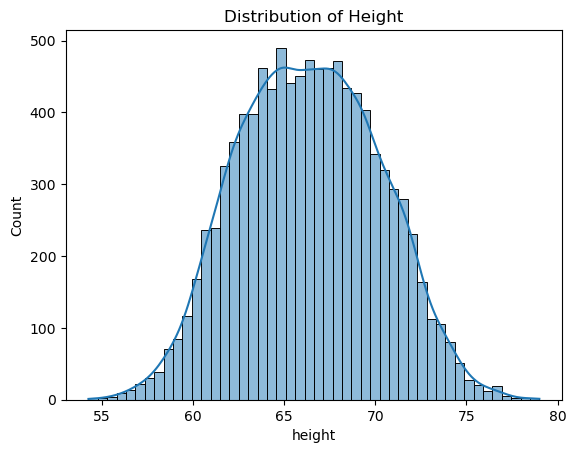

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.histplot(df_height.height, kde=True)
plt.title('Distribution of Height')
#plt.figure(figsize=(2,2))
plt.show();           

In [8]:
mean = df_height.height.mean()
mean

66.36755975482124

In [9]:
std = df_height.height.std()
std

3.8475281207732324

In [10]:
median = df_height.height.median()
median

66.31807008178464

In [11]:
values_below_3std = mean - (3 * std)
values_below_3std

54.82497539250154

In [12]:
values_above_3std = mean + (3 * std)
values_above_3std

77.91014411714094

In [14]:
outliers = df_height[(df_height.height < values_below_3std) | (df_height.height > values_above_3std)]
outliers

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [17]:
df_no_outlier = df_height[(df_height.height > values_below_3std) & (df_height.height < values_above_3std)]
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


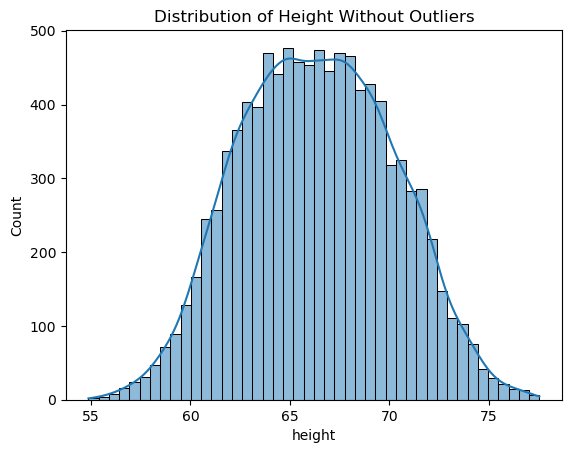

In [18]:
sb.histplot(df_no_outlier.height, kde=True)
plt.title('Distribution of Height Without Outliers')
plt.show;

## Z Score

In [19]:
df_height['zscore'] = (df_height.height - df_height.height.mean()) / df_height.height.std()

In [20]:
df_height

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


### Outlier removal with z score

In [21]:
df_height[(df_height.zscore < -3) | (df_height.zscore > 3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [22]:
df_no_outlier = df_height[(df_height.zscore > -3) & (df_height.zscore < 3)]
df_no_outlier.shape

(9993, 3)

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


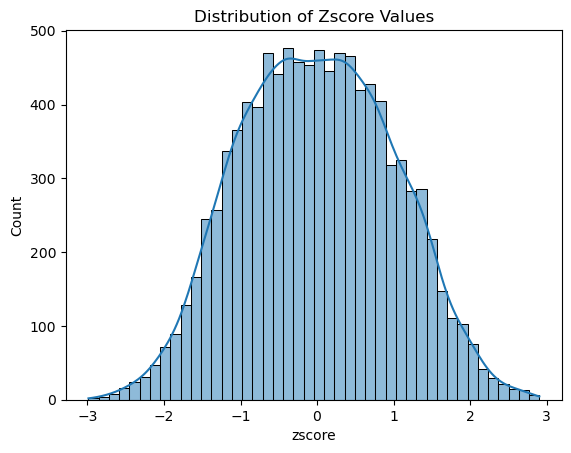

In [23]:
sb.histplot(df_no_outlier.zscore, kde=True)
plt.title('Distribution of Zscore Values')
plt.show();

## Exercise

In [26]:
df_wgt = df_[['Gender', 'Weight']]

In [27]:
df_wgt

,Gender,Weight
0,Male,241.893563
1,Male,162.310473
2,Male,212.740856
3,Male,220.042470
4,Male,206.349801
...,...,...
9995,Female,136.777454
9996,Female,170.867906
9997,Female,128.475319
9998,Female,163.852461


In [30]:
df_wgt.columns = df_wgt.columns.str.lower()

In [31]:
df_wgt

,gender,weight
0,Male,241.893563
1,Male,162.310473
2,Male,212.740856
3,Male,220.042470
4,Male,206.349801
...,...,...
9995,Female,136.777454
9996,Female,170.867906
9997,Female,128.475319
9998,Female,163.852461


C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


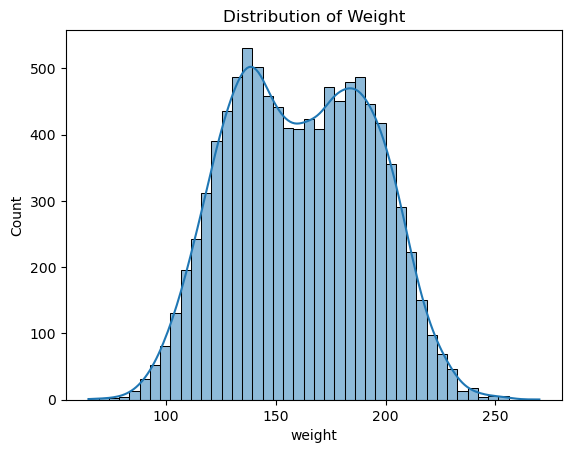

In [32]:
sb.histplot(df_wgt.weight, kde = True)
plt.title('Distribution of Weight');

### Percentile calculations

In [33]:
lower_qrt = df_wgt.weight.quantile(.001)
lower_qrt

83.02597422539151

In [34]:
higher_qrt = df_wgt.weight.quantile(.999)
higher_qrt

249.11069698680208

In [35]:
df_wgt[(df_wgt.weight < lower_qrt) | (df_wgt.weight > higher_qrt)]

,gender,weight
994,Male,255.690835
1506,Male,249.565628
1610,Male,255.863326
1750,Male,249.946283
2014,Male,269.989699
2070,Male,252.556689
2971,Male,250.317151
3285,Male,253.889004
3669,Male,251.425051
4331,Male,254.209073


In [36]:
df_wgt_no_outlier = df_wgt[(df_wgt.weight > lower_qrt) & (df_wgt.weight < higher_qrt)]
df_wgt_no_outlier.shape

(9980, 2)

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


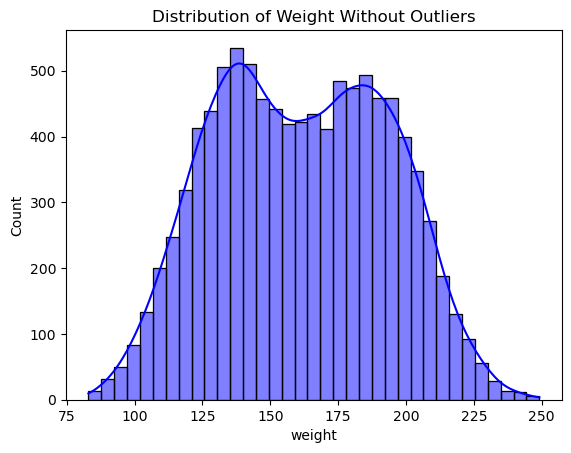

In [37]:
sb.histplot(df_wgt_no_outlier.weight, kde = True, color='b')
plt.title('Distribution of Weight Without Outliers');

## Outliers Removal with Standard Deviation

In [38]:
std_w = df_wgt.weight.std()
std_w

32.108439006519546

In [39]:
mean_w = df_wgt.weight.mean()
mean_w

161.44035683283076

In [40]:
values_below_3std = mean_w - (3 * std_w)
values_below_3std

65.11503981327212

In [41]:
values_above_3std = mean_w + (3 * std_w)
values_above_3std

257.7656738523894

In [42]:
df_wgt_outliers = df_wgt[(df_wgt.weight < values_below_3std) | (df_wgt.weight > values_above_3std)]
df_wgt_outliers

,gender,weight
2014,Male,269.989699
9285,Female,64.700127


In [44]:
df_wgt_no_outliers = df_wgt[(df_wgt.weight > values_below_3std) & (df_wgt.weight < values_above_3std)]
df_wgt_no_outliers.shape

(9998, 2)

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weight', ylabel='Count'>

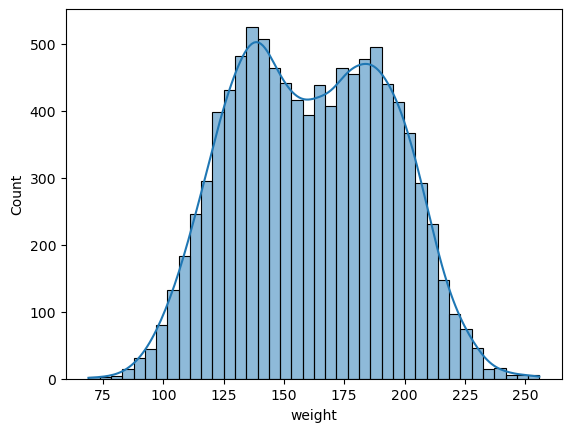

In [45]:
sb.histplot(df_wgt_no_outliers.weight, kde = True)

## Outliers Removal with  Z Score

In [46]:
df_wgt['zscore'] = (df_wgt.weight - df_wgt.weight.mean()) / df_wgt.weight.std()
df_wgt= df_wgt[['gender', 'weight', 'zscore']]
df_wgt

,gender,weight,zscore
0,Male,241.893563,2.505672
1,Male,162.310473,0.027099
2,Male,212.740856,1.597726
3,Male,220.042470,1.825131
4,Male,206.349801,1.398680
...,...,...,...
9995,Female,136.777454,-0.768113
9996,Female,170.867906,0.293616
9997,Female,128.475319,-1.026678
9998,Female,163.852461,0.075124


In [47]:
df_wgt[(df_wgt.zscore < -3) | (df_wgt.zscore > 3)]

,gender,weight,zscore
2014,Male,269.989699,3.380711
9285,Female,64.700127,-3.012922


In [48]:
df_wgt_no_outliers = df_wgt[(df_wgt.zscore > -3) & (df_wgt.zscore < 3)]
df_wgt_no_outliers

,gender,weight,zscore
0,Male,241.893563,2.505672
1,Male,162.310473,0.027099
2,Male,212.740856,1.597726
3,Male,220.042470,1.825131
4,Male,206.349801,1.398680
...,...,...,...
9995,Female,136.777454,-0.768113
9996,Female,170.867906,0.293616
9997,Female,128.475319,-1.026678
9998,Female,163.852461,0.075124


C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'DIstribution of Z Score Datapoints')

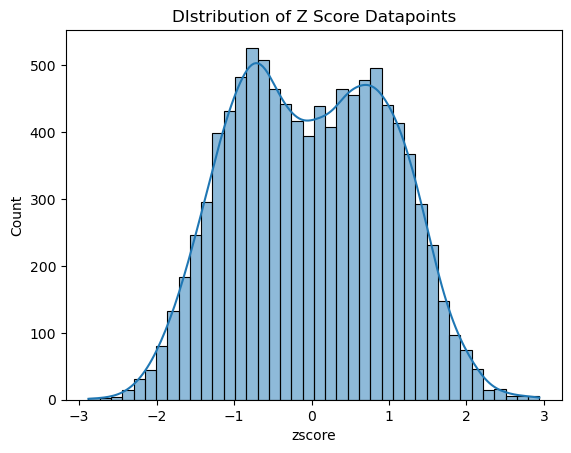

In [51]:
plt = sb.histplot(df_wgt_no_outliers.zscore, kde = True)
plt.set_title("DIstribution of Z Score Datapoints", loc = 'center')